# Khóa học VIA - Bài học: Làm quen với xử lý ảnh cơ bản


<img width="120px" src="https://via.makerviet.org/media/via-logo.png">

**Website:** https://via.makerviet.org/

Nội dung khóa học này được tạo và phân phối miễn phí cho người học bởi các thành viên của dự án VIA. Toàn bộ bản quyền các nội dung trong khóa học thuộc về [MakerHanoi](https://www.facebook.com/makerhanoi/).


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/makerhanoi/via-course-ai/blob/master/notebooks/02-OpenCV-co-ban.ipynb)|


Bài học này cung cấp các kiến thức cơ bản nhất về xử lý ảnh, cách sử dụng thư viện OpenCV - một thư viện phổ biến trong xử lý ảnh - để đọc, hiển thị và chuyển đổi ảnh giữa các hệ màu khác nhau.

## 1. Đọc và hiện ảnh

Trước tiên chúng ta cùng làm quen với thư viện xử lý ảnh OpenCV và các thao tác đọc, hiển thị ảnh trên Colab notebook. Đoạn mã nguồn sau sẽ giúp import các thư viện cần thiết. Thư viện OpenCV trong Python được sử dụng với tên `cv2`. Thông thường, khi chạy OpenCV trên môi trường Python của máy tính, chúng ta có thể sử dụng lệnh `cv2.imshow("<Tên cửa sổ>", <hình ảnh>)` để mở một cửa sổ hiện ảnh. Tuy nhiên, với môi trường của sổ tay Colab, chúng ta không thể mở một cửa sổ mới, vì thế  cần import thêm `cv2_imshow()` để hiển thị ảnh, thay thế cho `cv2.imshow()`.

In [ ]:
# Import các thư viện cần thiết
from google.colab.patches import cv2_imshow # Dùng để hiện ảnh trên Colab
import cv2
import numpy as np

**Tải và hiện ảnh từ URL:** Với các ảnh được tìm thấy trên mạng, các bạn có thể dùng lệnh `wget` để tải về và hiện chúng lên với OpenCV. Ví dụ như sau:

In [3]:
# Tải hình ảnh và hiển thị trên notebook.
# Câu lệnh này sẽ thực hiện tải hình ảnh logo VIA từ đường dẫn https://via.makerviet.org/media/via-logo.,
# lưu lại dưới tên `via-logo.jpg`. Để sao chép đường dẫn của một hình ảnh trên Chrome, các bạn ấn chuột phải, 
# chọn `Copy image address` hoặc `Sao chép URL `
!wget https://via.makerviet.org/media/via-logo.jpg -O via-logo.jpg

--2021-11-27 15:09:32--  https://via.makerviet.org/media/via-logo.jpg
Resolving via.makerviet.org (via.makerviet.org)... 54.151.22.39, 138.68.234.180, 2600:1f1c:471:9d01:72ed:135d:4dff:a852, ...
Connecting to via.makerviet.org (via.makerviet.org)|54.151.22.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33443 (33K) [image/jpeg]
Saving to: ‘via-logo.jpg’

via-logo.jpg        100%[===================>]  32.66K  --.-KB/s    in 0.02s   

2021-11-27 15:09:32 (1.54 MB/s) - ‘via-logo.jpg’ saved [33443/33443]



Tiếp đó, chúng ta mở hình ảnh với OpenCV và hiển thị trên notebook:

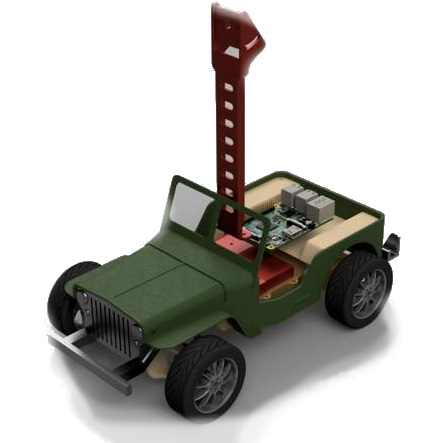

In [4]:
img = cv2.imread("via-logo.jpg") # Đọc ảnh via-logo.jpg
cv2_imshow(img) # Hiện ảnh

Như vậy, hình ảnh `via-logo.jpg` đã được đọc lên với hàm `cv2.imread()` và hiển thị với lệnh `cv2_imshow()`. Bạn hãy thử tìm một hình ảnh khác trên Google, ấn chuột phải và chọn sao chép đường dẫn của nó, sau đó thử tải và hiển thị lên với OpenCV để làm quen nhé. Bạn cũng có thể chọn tải lên một ảnh từ máy tính của minh với trinh đơn **Files** ở bên tay trái của Colab.

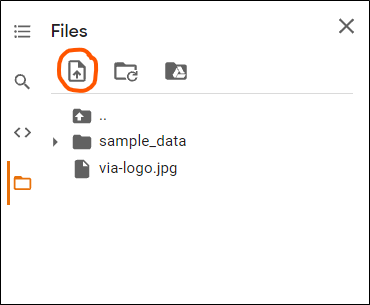


## 2. Các không gian màu và chuyển đổi hệ màu

### Không gian màu RGB

Các ảnh khi chúng ta đọc lên bằng OpenCV ở phần mã nguồn trước, nếu không có gì thay đổi, hoặc truyền các tham số đặc biệt vào hàm `cv2.imread()` thì sẽ được biểu diễn trong máy tính bằng sự kết hợp của 3 màu cơ bản: xanh lam, xanh lục, đỏ, theo thứ tự đó, hay còn gọi là không gian màu BGR (blue-green-red). Tại mỗi điểm ảnh, việc pha trộn 3 màu sắc cơ bản này sẽ tạo ra các màu sắc đa dạng khác nhau. Giá trị của mỗi màu (đỏ, lục, lam) thường được biểu diễn dưới dạng số nguyên, giá trị từ 0 (đen) đến 255 (trắng - giá trị cực đại của màu sắc đó). Khi đó, việc kết hợp 3 giá trị của các màu này sẽ thu được 255 x 255 x 255 = 16581375 màu sắc khác nhau. Các bạn có thể thử chọn các màu sắc khác nhau và xem chúng được tạo từ 3 giá trị R (red), G (green) và B (blue) nào tại liên kết sau:
	https://www.w3schools.com/colors/colors_picker.asp.

Chúng ta sẽ thử tách hình ảnh lúc đầu và hiển thị màu sắc tại 3 kênh màu riêng biệt như sau. 


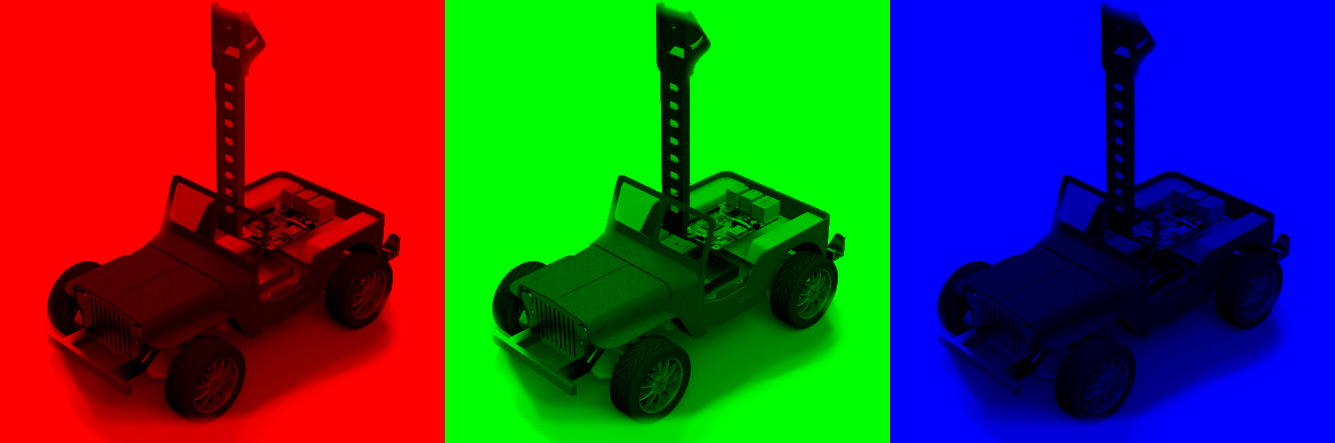

In [5]:
# Tách các kênh màu
B, G, R = cv2.split(img)
# Hiển thị ở màu sắc của chúng
zeros = np.zeros(img.shape[:2], dtype="uint8")
R_merge = cv2.merge([zeros, zeros, R])
G_merge = cv2.merge([zeros, G, zeros])
B_merge = cv2.merge([B, zeros, zeros])
merge = np.hstack([R_merge, G_merge, B_merge])
cv2_imshow(merge)

Ở thư viện OpenCV, không gian màu mặc định là **BGR (lục, lam, đỏ)**, khác với rất nhiều hệ thống khác, cũng sử dụng hệ gồm 3 màu cơ bản này, nhưng theo thứ tự ngược lại là **RGB**. Để chuyển đổi giữa hai không gian màu này, ta sử dụng cú pháp như sau:

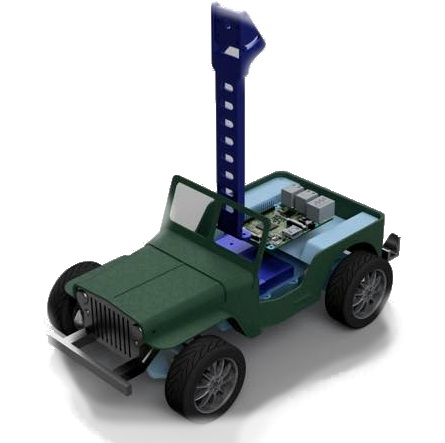

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img_rgb)

Nếu bạn dùng lệnh `cv2_imshow()` để hiển thị hình ảnh thu được là `img_rgb`, bạn sẽ nhận thấy không gian màu đã bị thay đổi, và hình ảnh hiện lên không còn đúng màu sắc ban đầu nữa. Đó là vì các hàm `cv2_imshow()` hoặc `cv2.imshow()` sử dụng không gian màu BGR để hiển thị ảnh, khi truyền hình ảnh ở không gian màu khác, việc hiển thị có thể không đúng. Vì vậy, chúng ta nên chuyển đổi ảnh về hệ màu xám, hoặc không gian BGR trước khi hiển thị. Sau đây là câu lệnh chuyển đổi ảnh `img_rgb` ở không gian màu RGB thành `img_bgr` ở không gian màu BGR.

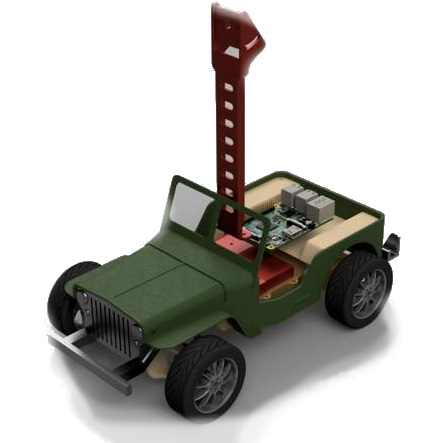

In [7]:
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
cv2_imshow(img_bgr)

### Không gian ảnh xám

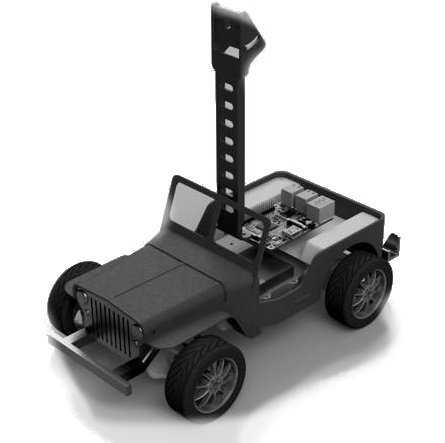

In [8]:
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

### Không gian màu LAB

Không gian màu **LAB** được xây dựng dựa trên sự cảm nhận màu sắc của mắt người. Hệ màu này cũng có 3 kênh màu như **BGR**, nhưng gồm 3 thành phần khác, một trong số chúng là độ sáng (cường độ). 

-	L: Độ sáng (Cường độ).
-	A: thành phần màu từ Xanh lục đến Đỏ tươi.
-	B: thành phần màu từ Xanh lam đến Vàng.

Để chuyển đổi từ không gian màu BGR sang LAB, chúng ta dùng lệnh sau:


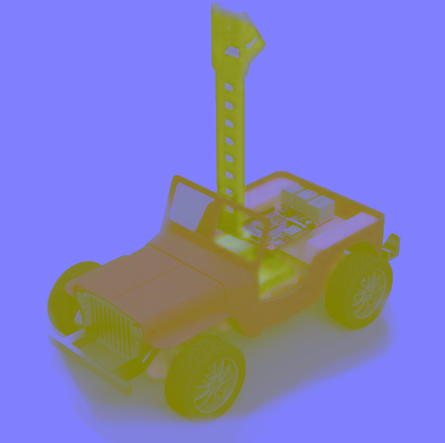

In [11]:
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
cv2_imshow(img_lab)

### Không gian màu HSV (HSB)

Một không gian màu khác cũng được ứng dụng rất nhiều trong xử lý ảnh là **HSV**, với 3 kênh:

-	H: (Hue) Vùng màu
-	S: (Saturation) Độ bão hòa màu
-	B (hay V): (Bright hay Value) độ sáng

Vì giá trị màu của **HSV (H)** được tách ra thành một kênh riêng, chúng ta có thể sử dụng kênh này để lọc ra các vùng có màu sắc mong muốn, ứng dụng trong việc phát hiện đồ vật theo màu sắc. Để chuyển đổi từ không gian màu **BGR** sang **HSV**, ta dùng câu lệnh như dưới.


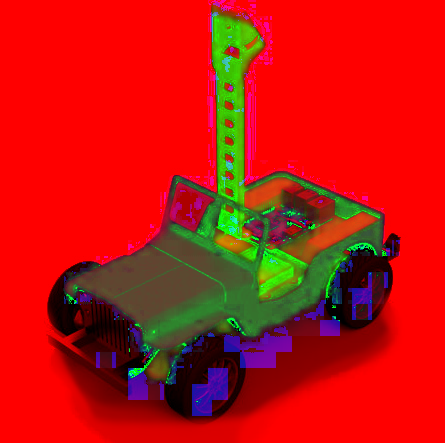

In [12]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

Tựu chung lại, chúng ta có nhiều không gian màu khác nhau được sử dụng cho những mục đích khác nhau trong quá trình xử lý trên máy tính. Nhiều không gian màu đã được hỗ trợ bởi OpenCV. Việc chuyển đổi giữa các không gian màu này có thể dùng cú pháp tương tự nhau:

```
output_img = cv2.cvtColor(input_img, cv2.COLOR_<hệ màu cũ>2<hệ màu mới> 
```